# **Práctica 6: Transformaciones**

<img src ="https://epigijon.uniovi.es/image/image_gallery?uuid=903ae5c8-b29b-430e-980d-1a19a885c736&groupId=3743853&t=1688576582973" width=300 px>

Este cuaderno desarrolla contenidos prácticos de la asignatura **Visión artificial** del Grado en Ciencia e Ingeniería de Datos.

***

In [2]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
import scipy

# Implementación

La transformación geométrica en imágenes es un campo fundamental en el procesamiento de imágenes y la visión por computador, abordando la modificación de la posición, orientación y escala de objetos en una imagen. Estas transformaciones, como traslación, rotación y escalado, son cruciales para corregir distorsiones, alinear imágenes, realinear objetos y simular perspectivas. Estas operaciones permiten adaptar la geometría de las imágenes, facilitando diversas aplicaciones, desde la corrección de imperfecciones hasta la manipulación creativa de contenidos visuales.

Para realizar transformaciones en un espacio 2D a menudo es conveniente trabajar con coordenadas homogéneas. Las coordenadas homogéneas son una extensión del sistema de coordenadas euclidiano que facilita ciertas operaciones matriciales, como las utilizadas en transformaciones geométricas.

> Implementa una función para convertir puntos 2D a coordenadas homogéneas. Como entrada se reciben un array de tamaño $2 \times N$, donde $N$ es el número de puntos. La salida es un array de tamaño $3 \times N$ añadiendo una fila de unos.

> Implementa una función para convertir coordenadas homogéneas a puntos 2D. Como entrada se reciben un array de tamaño $3 \times N$, donde $N$ es el número de puntos. La salida es un array de tamaño $2 \times N$ tras dividir las dos primeras filas entre la tercera.

> Añade tests usando `np.testing.assert_allclose` para verificar el correcto funcionamiento de las funciones.

> Define un conjunto de puntos y verifica su transformación. Utiliza como ejemplo el siguiente [demostrador](https://iis.uibk.ac.at/public/piater/courses/demos/homography/homography.xhtml)

In [3]:
def de2D_coordenadas_homogeneas(a):
    if len(a)!=2:
        print("El array no tiene solamente dos filas")
        return
    N=a.shape[1]
    b=a.copy()
    homo= np.vstack((b, np.ones(N)))
    return homo

puntos_2d = np.array([[1, 2, 3],
                      [4, 5, 6]])
resultado_esperado=np.array([[1, 2, 3],
                      [4, 5, 6],
                      [1,1,1]])
coordenadas_homogeneas = de2D_coordenadas_homogeneas(puntos_2d)
bien_mal= np.testing.assert_allclose(resultado_esperado,coordenadas_homogeneas,atol=1e-8)
print(bien_mal)

None


In [9]:
def coordenadas_homogeneas_a2D(a):
    if len(a)!=3:
        print("El array no tiene solamente tres filas")
        return
    N=a.shape[1]
    b=a.copy()
    b[0]=b[0]/b[2]
    b[1]=b[1]/b[2]
    matriz = np.delete(b, 2, axis=0)
    return matriz


puntos_2d = np.array([[4, 8, 6],
                      [4, 10, 6],
                      [2, 2, 2]])
resultado_esperado=np.array([[2,4,3],[2,5,3]])
coordenadas_homogeneas = coordenadas_homogeneas_a2D(puntos_2d)
bien_mal= np.testing.assert_allclose(resultado_esperado,coordenadas_homogeneas,atol=1e-8)
print(bien_mal)

None


> Implementa una función que permita realizar la transformación geométrica de una imagen `def transform_image(img, matrix)` siguiendo los siguientes pasos:

> Crea un array con las coordenadas de los límites de la imagen (esquina superior izquierda, derecha, etc.).
>
> Convierte el array a coordenadas homogéneas, realiza la transformación usando la multiplicación de matrices, y determina los límites mínimos y máximos de las esquinas transformadas.
>
> Crea un array de puntos entre los punto mínimo y máximo en cada eje usando `np.linspace`. El número de elementos se puede recibir como parámetro a la función de transformación.
>
> Crea un grid usando `np.meshgrid`.
>
> Transforma las coordenadas del grid usando la transformación inversa.
>
> Para cada canal de la imagen, reinterpola la imagen en las coordenadas transformadas usando `scipy.ndimage.map_coordinates`. Esta función recibe las coordenadas en este orden: primero las filas y luego las columnas.
>
> La función debe retornar la imagen transformada y las dimensiones (`[xmin, xmax, ymax, ymin]`)
>
> Visualiza la imagen usando `imshow(warped, extent=extent)`



In [20]:
dx = 10  # traslación en el eje x
dy = 20  # traslación en el eje y
matrix = np.array([[1, 0, dx],
                   [0, 1, dy],
                   [0, 0, 1]])
def transform_image(img,matrix,num_points):
    #Detectamos los limites de la imagen
    superior_izquierda=[0,0,1]
    superior_derecha=[img.shape[1]-1,0,1]
    inferior_izquierda=[0,img.shape[0]-1,1]
    inferior_derecha=[img.shape[1]-1,img.shape[0]-1,1]

    esquinas = np.array([superior_izquierda,superior_derecha,inferior_izquierda,inferior_derecha])
    #Realizamos la transformacion-convertimos a coordenadas homogeneas
    esquinas_transformadas_homogeneas = np.dot(matrix, esquinas.T).T
    print(esquinas_transformadas_homogeneas)
    # Convertir las coordenadas homogéneas a coordenadas cartesianas
    esquinas_transformadas = esquinas_transformadas_homogeneas[:, :2] / esquinas_transformadas_homogeneas[:, 2][:, None]

    # Calcular los límites mínimos y máximos de las esquinas transformadas
    min_x, min_y = np.min(esquinas_transformadas, axis=0)
    max_x, max_y = np.max(esquinas_transformadas, axis=0)

    #Crear array de puntos entre el min y el max
    x_points = np.linspace(min_x, max_x, num_points)
    y_points = np.linspace(min_y, max_y, num_points)

    # Crear grid bidimensional usando np.meshgrid
    x_grid, y_grid = np.meshgrid(x_points, y_points)
    
    #Hacer la inversa de las coordenadas con la transformada





    #Primero filas y luego columnas
    for channel in range(img.shape[2]):
        scipy.ndimage.map_coordinates(y_grid,x_grid)
    
    
    return min_x, min_y, max_x, max_y


img = skimage.io.imread("pareja.png")

transform_image(img,matrix)
    

[[  10   20    1]
 [1509   20    1]
 [  10 2019    1]
 [1509 2019    1]]


(10.0, 20.0, 1509.0, 2019.0)

> Implementa ejemplos de traslaciones, rotaciones, proyecciones y combinaciones de estas.



# Estimación

La estimación de una transformación se realiza comúnmente utilizando métodos de mínimos cuadrados para minimizar la diferencia entre las coordenadas transformadas y las coordenadas reales de los puntos correspondientes.

Como ejemplo, se va a estimar una transformación para obtener una imagen frontal de un cuadro.

In [ ]:
!curl http://www.atc.uniovi.es/grado/3va/prac/pareja.png -o pareja.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  2 2862k    2 73222    0     0  1628k      0  0:00:01 --:--:--  0:00:01 1787k
100 2862k  100 2862k    0     0  4115k      0 --:--:-- --:--:-- --:--:-- 4142k


In [ ]:
import skimage.io
img = skimage.io.imread("pareja.png")
img = img_as_float(img)
plt.imshow(img)
plt.show()

NameError: name 'img_as_float' is not defined

En este caso, se proporcionan las coordenadas en la imagen en píxeles y las de destino en milímetros.

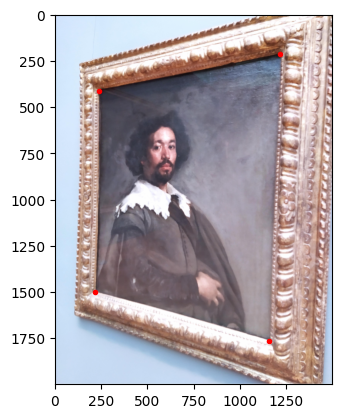

In [21]:
src = np.array(
    [
        [ 240,  218, 1219, 1159],
        [ 410, 1498,  212, 1765]
    ]
)
W = 699
H = 813
dst = np.array(
    [
        [  0,   0, 699, 699],
        [  0, 813,   0, 813]
    ]
)
plt.imshow(img)
plt.plot(src[0,:], src[1,:], '.r')
plt.show()

Para estimar la transformación, dados los puntos en la imagen $(x_i, y_i)$ y sus correspondencias en coordenadas del mundo $(x_i', y_i')$. Se debe resolver el sistema de ecuaciones:

$$
\begin{bmatrix}
    0 & 0 & 0 & -w_1 x_1 & -w_1 y_1 & -w_1 \\
    w_1 x_1 & w_1 y_1 & w_1 & 0 & 0 & 0 \\
    -y'_1 x_1 & -y'_1 y_1 & -y'_1 & x'_1 x_1 & x'_1 y_1 & x'_1 \\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
    0 & 0 & 0 & -w_n x_n & -w_n y_n & -w_n \\
    w_n x_n & w_n y_n & w_n & 0 & 0 & 0 \\
    -y'_n x_n & -y'_n y_n & -y'_n & x'_n x_n & x'_n y_n & x'_n \\
\end{bmatrix}
\begin{bmatrix}
    h_{11} \\
    h_{12} \\
    h_{13} \\
    h_{21} \\
    h_{22} \\
    h_{23} \\
    h_{31} \\
    h_{32} \\
    h_{33}
\end{bmatrix} = \mathbf{0}
$$

> Para estimar la transformación se deben seguir los siguientes pasos:
>
> Construye la matriz de coeficientes tal y como se muestra en la ecuación anterior usando todos los puntos disponibles.
>
> Utiliza la función `scipy.linalg.svd` para obtener la descomposición de valores singulares de la matriz de coeficientes. La solución es la última fila de $V$: `V[-1, :].reshape(3, 3)`.
>
> Transforma la imagen usando el resultado anterior y verifica el resultado.
>
> Estima la transformación usando `skimage.transform.estimate_transform` y verifica que proporciona los mismos resultados.

In [24]:
matriz=np.array([[0,0,0,-W*240,-W*240,-W],[W*240,W*410,W,0,0,0],[-0*240,-0*410,-0,0*240,0*410,0],
                [0,0,0,-W*218,-W*1498,-W],[W*218,W*1498,W,0,0,0],[-813*218,-813*1498,-813,0*218,0*1498,0],
                [0,0,0,-W*1219,-W*212,-W],[W*1219,W*212,W,0,0,0],[-0*1219,-0*212,0,699*1219,699*212,699],
                [0,0,0,-W*1159,-W*1765,-W],[W*1159,W*1765,W,0,0,0],[-813*1159,-813*1765,813,699*1159,699*1765,699]])

In [27]:
from scipy import linalg
_, _, V = linalg.svd(matriz)
V[-1, :].reshape(3, 3)

ValueError: cannot reshape array of size 6 into shape (3,3)

In [32]:
from scipy.linalg import svd
# Construye la matriz de coeficientes
num_points = src.shape[1]
matriz_coeficientes = np.zeros((2 * num_points, 9))

for i in range(num_points):
    x, y = src[0, i], src[1, i]
    x_, y_ = dst[0, i], dst[1, i]
    
    matriz_coeficientes[2 * i, :] = [0, 0, 0, -W * x, -W * y, -W, y_ * x, y_ * y, y_]
    matriz_coeficientes[2 * i + 1, :] = [W * x, W * y, W, 0, 0, 0, -x_ * x, -x_ * y, -x_]
print(matriz_coeficientes)
# Realiza la descomposición de valores singulares (SVD)
_, _, V = svd(matriz_coeficientes)

# Extrae la solución de la última columna de V
homografia_svd = V[-1, :].reshape(3, 3)

[[ 0.000000e+00  0.000000e+00  0.000000e+00 -1.677600e+05 -2.865900e+05
  -6.990000e+02  0.000000e+00  0.000000e+00  0.000000e+00]
 [ 1.677600e+05  2.865900e+05  6.990000e+02  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 -1.523820e+05 -1.047102e+06
  -6.990000e+02  1.772340e+05  1.217874e+06  8.130000e+02]
 [ 1.523820e+05  1.047102e+06  6.990000e+02  0.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 -8.520810e+05 -1.481880e+05
  -6.990000e+02  0.000000e+00  0.000000e+00  0.000000e+00]
 [ 8.520810e+05  1.481880e+05  6.990000e+02  0.000000e+00  0.000000e+00
   0.000000e+00 -8.520810e+05 -1.481880e+05 -6.990000e+02]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 -8.101410e+05 -1.233735e+06
  -6.990000e+02  9.422670e+05  1.434945e+06  8.130000e+02]
 [ 8.101410e+05  1.233735e+06  6.990000e+02  0.000000e+00  0.000000e+00
   0.000000

ValueError: cannot reshape array of size 6 into shape (3,3)